In [76]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import os
import csv
import seaborn as sns
from googlefinance import getQuotes
import math
import json
%matplotlib inline
import locale


locale.setlocale( locale.LC_ALL, '' )
print(Path.cwd())

def getInputFilePath():
    inputPath = input('Enter the path & file name that you wish to read from:')
    return inputPath

def getDataTable(data_path,index_column,csv=True,panda=True,datetime_format=True,parse_dates=True,sort=True,dropNulls=True):
    if csv==True and panda!=True:
        with open(csvPath,'r') as csvFile:
            csvReader = csv.reader(csvFile,delimiter = ',')
            print(type(csvReader))
            #defining Parameters
            header = next(csvReader)
        return csvReader
    elif panda==True:
        if csv==True:
            df = pd.read_csv(data_path, index_col=index_column, infer_datetime_format=datetime_format, parse_dates=parse_dates)
        if sort:
            df.sort_index(inplace=True)
        if dropNulls:
            df.dropna(inplace=True)
        return df

def setOutputPath():
    outputPath = input('Enter the path & file name that you wish to output to:')
    return outputPath

def writeCsvPath(outputPath,data=None,header=True):
    # Set the output header
    header = ["Net_Total","Number_of_Months","Min_Profit_Loss","Max_Profit_Loss","Average_Profit_Loss"]

    # Set the output file path
    output = Path(outputPath)

    # Open the output path as a file object
    with open(output,'w') as csvfile:
        # Set the file object as a csvwriter object
        csvwriter = csv.writer(csvfile, delimiter=',')
        # Write the header to the output file
        if header == True:
            csvwriter.writerow(header)
        # Write the list of dictionary items to the output file
        csvwriter.writerow(data.items())
        
def combine_DataTables(dataList,join,axis='columns',printData=None,sortData=None):
    
    combined_df = pd.concat(dataList,axis=axis,join=join)
    if sortData:
        combined_df.sort_index(inplace=True)
    if printData:
        combined_df.head()
    
    return combined_df

/Users/torylbrown/Desktop/Fintech/python-homework/Whale_Portfolio_Pandas4


In [78]:
#Getting Dataframes with functions
input_path_whale = getInputFilePath()
whale_df = getDataTable(input_path_whale,'Date')

input_path_algo = getInputFilePath()
algo_df = getDataTable(input_path_algo,'Date')

input_path_sp500 = getInputFilePath()
sp500_df = getDataTable(input_path_sp500,'Date')

#Fixing the S&P 500 dataframe & creating the clean version of the S&P 500 Daily Return
sp500_df['Close'] = sp500_df['Close'].str.replace('$','')
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.dropna(inplace=True)
sp500_dr = sp500_df.pct_change()
sp500_dr.dropna(inplace=True)
sp500_dr.sort_index(inplace=True)
sp500_dr.columns = ['S&P 500']

#printing dataframes
#print(whale_df.head())
#print(algo_df.head())
#print(sp500_dr.head())

#Combining/Concatenating Dataframes
combined_Daily_Returns = combine_DataTables([whale_df,algo_df,sp500_dr],join='inner',axis='columns',sortData=True)
combined_Daily_Returns.head()


#print(f'The results are here: {results}')
#outFile = setOutputPath()
#writeCsvPath(outFile,data=results,header=False)


Enter the path & file name that you wish to read from: Resources/whale_returns.csv
Enter the path & file name that you wish to read from: Resources/algo_returns.csv
Enter the path & file name that you wish to read from: Resources/sp500_history.csv


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [74]:
sp500_df.isnull().sum()

Close    0
dtype: int64

Text(0, 0.5, 'Daily Returns of Tickers')

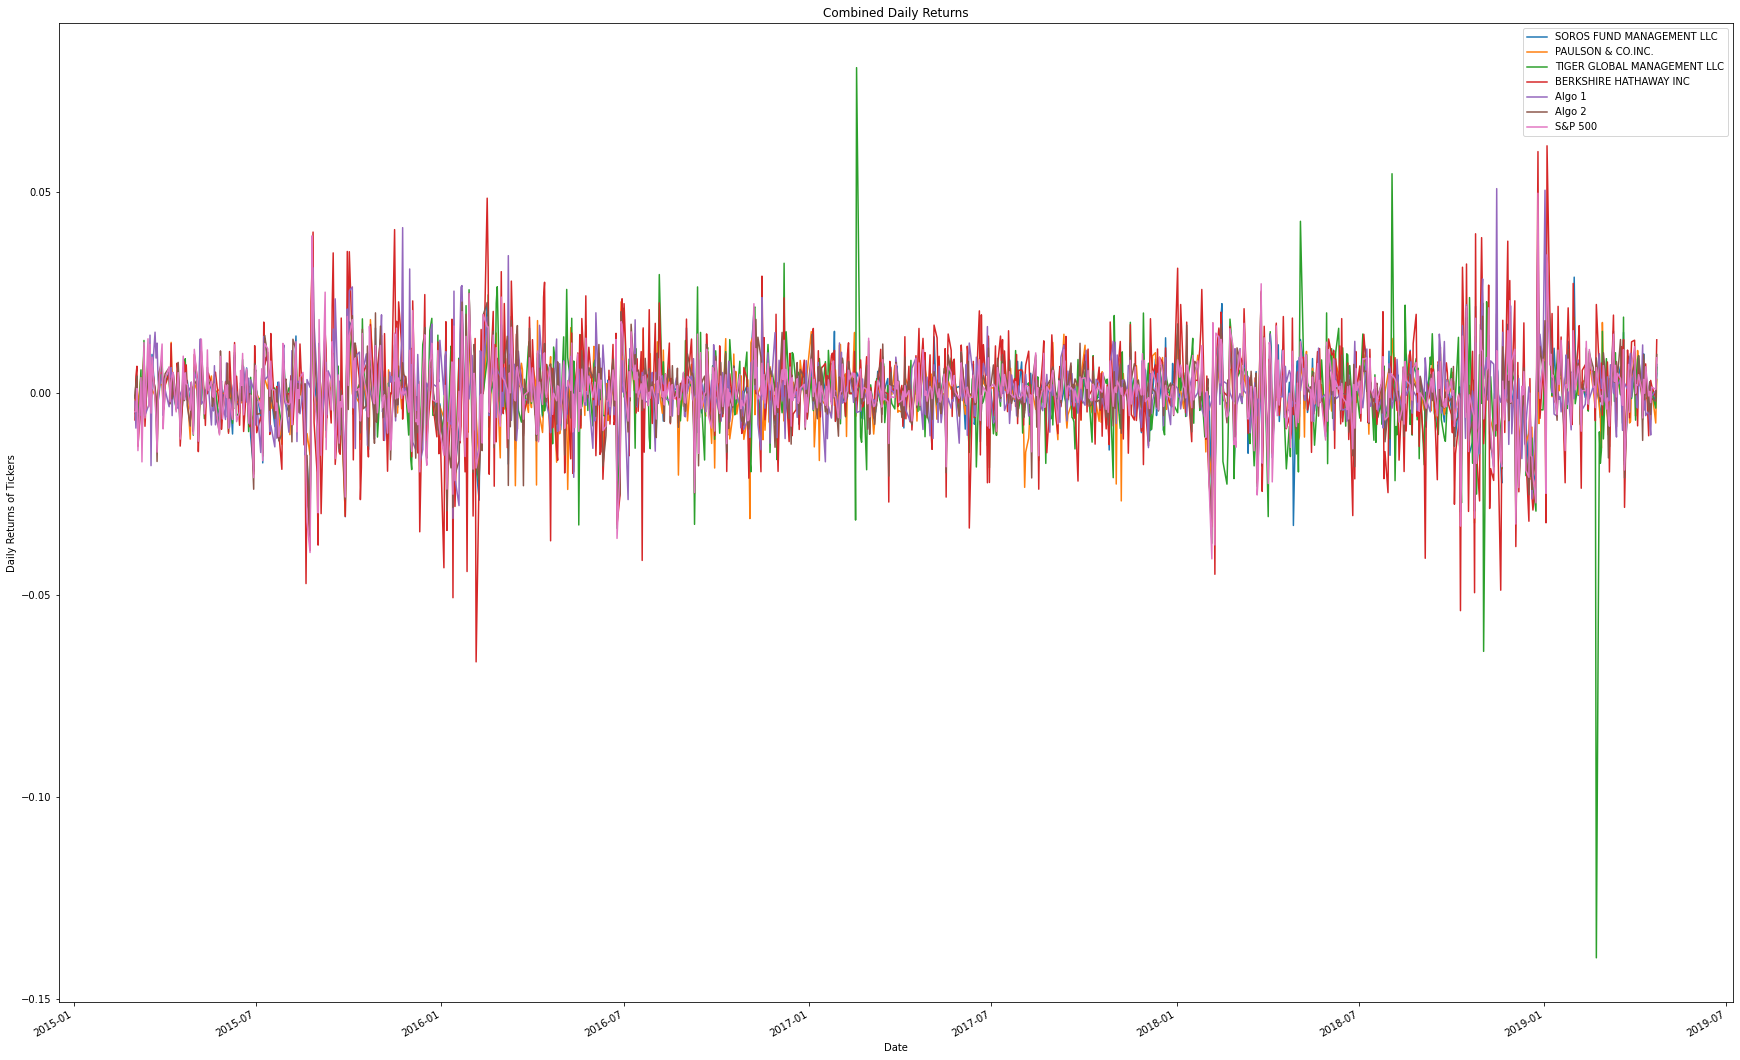

In [80]:
#Ploting Daily Returns
ax = combined_Daily_Returns.plot(title='Combined Daily Returns',figsize=(30, 20))
ax.set_ylabel('Daily Returns of Tickers')

<AxesSubplot:title={'center':'Combined Cumulative Returns'}, xlabel='Date'>

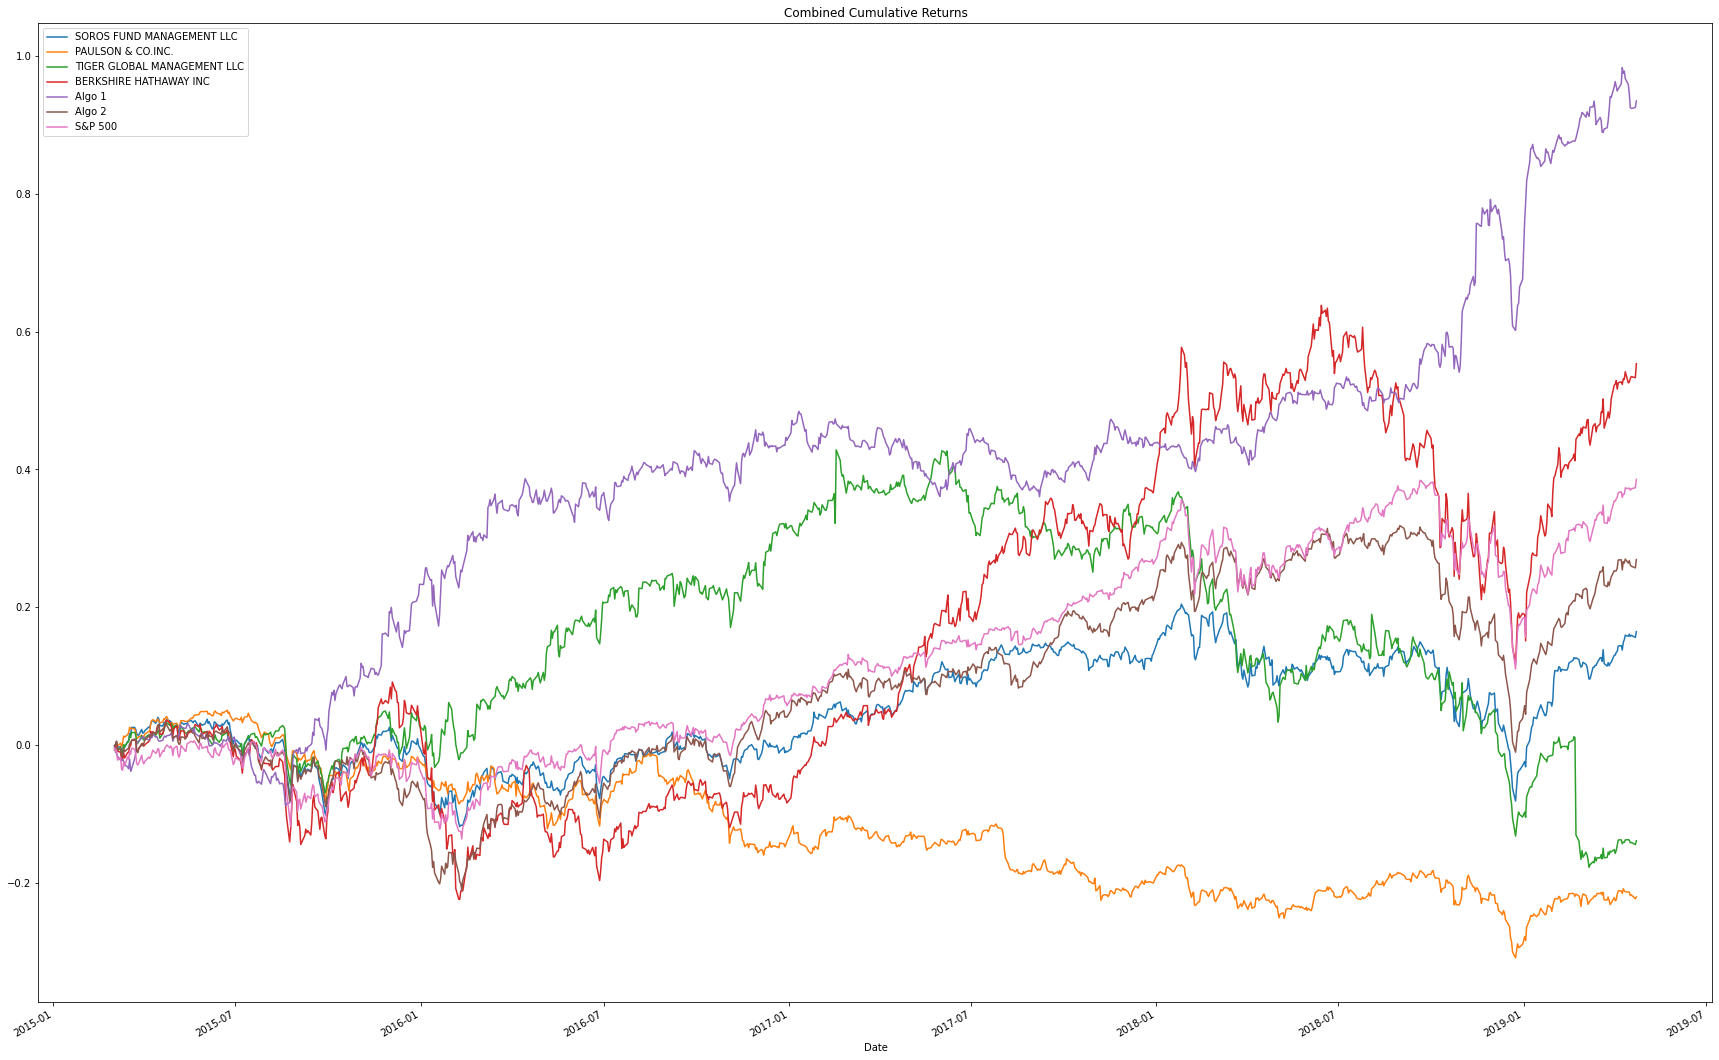

In [81]:
# Calculate cumulative returns of all portfolios
combined_cum_returns = (1 + combined_Daily_Returns).cumprod() - 1
# Plot cumulative returns
combined_cum_returns.plot(title='Combined Cumulative Returns',figsize=(30, 20))

<AxesSubplot:>

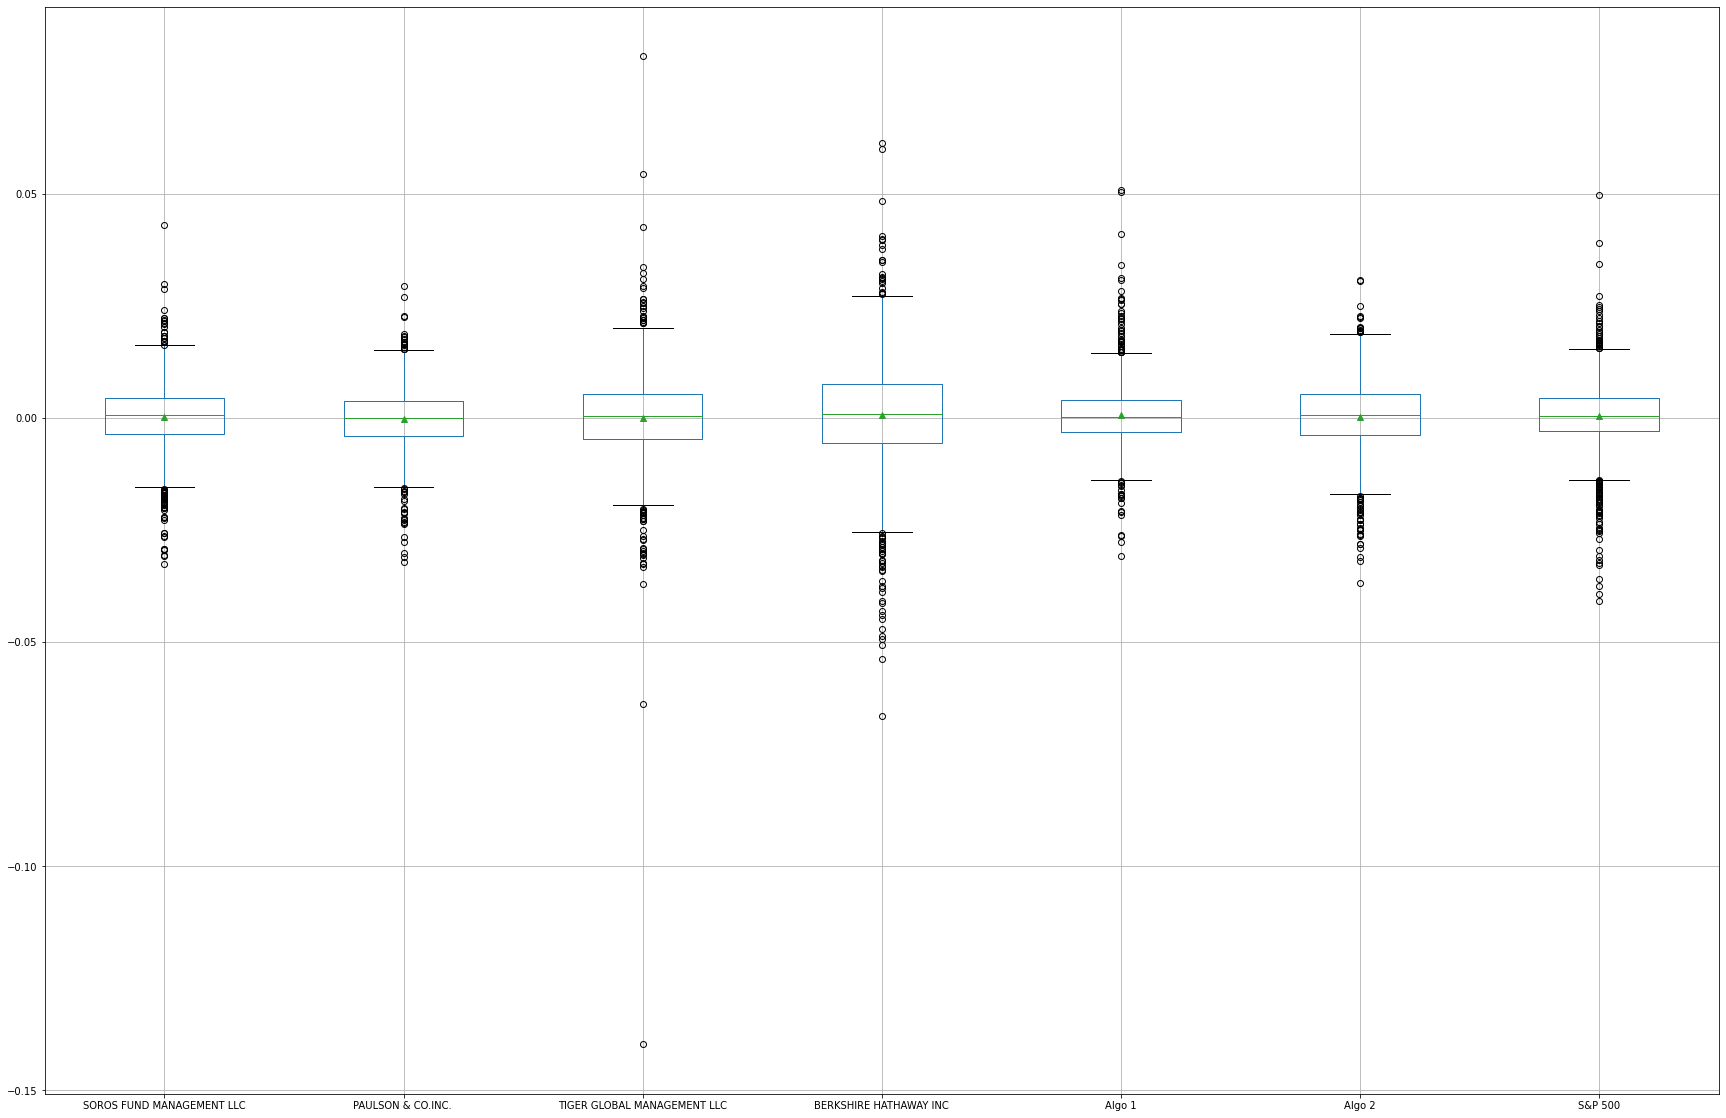

In [82]:
# Box plot to visually show risk
combined_Daily_Returns.boxplot(figsize=(30, 20),showmeans=True)

In [85]:
# Calculate the daily standard deviations of all portfolios
combined_Daily_Returns_std = combined_Daily_Returns.std()
print(combined_Daily_Returns_std)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64


In [86]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_Daily_Returns_std * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

<AxesSubplot:xlabel='Date'>

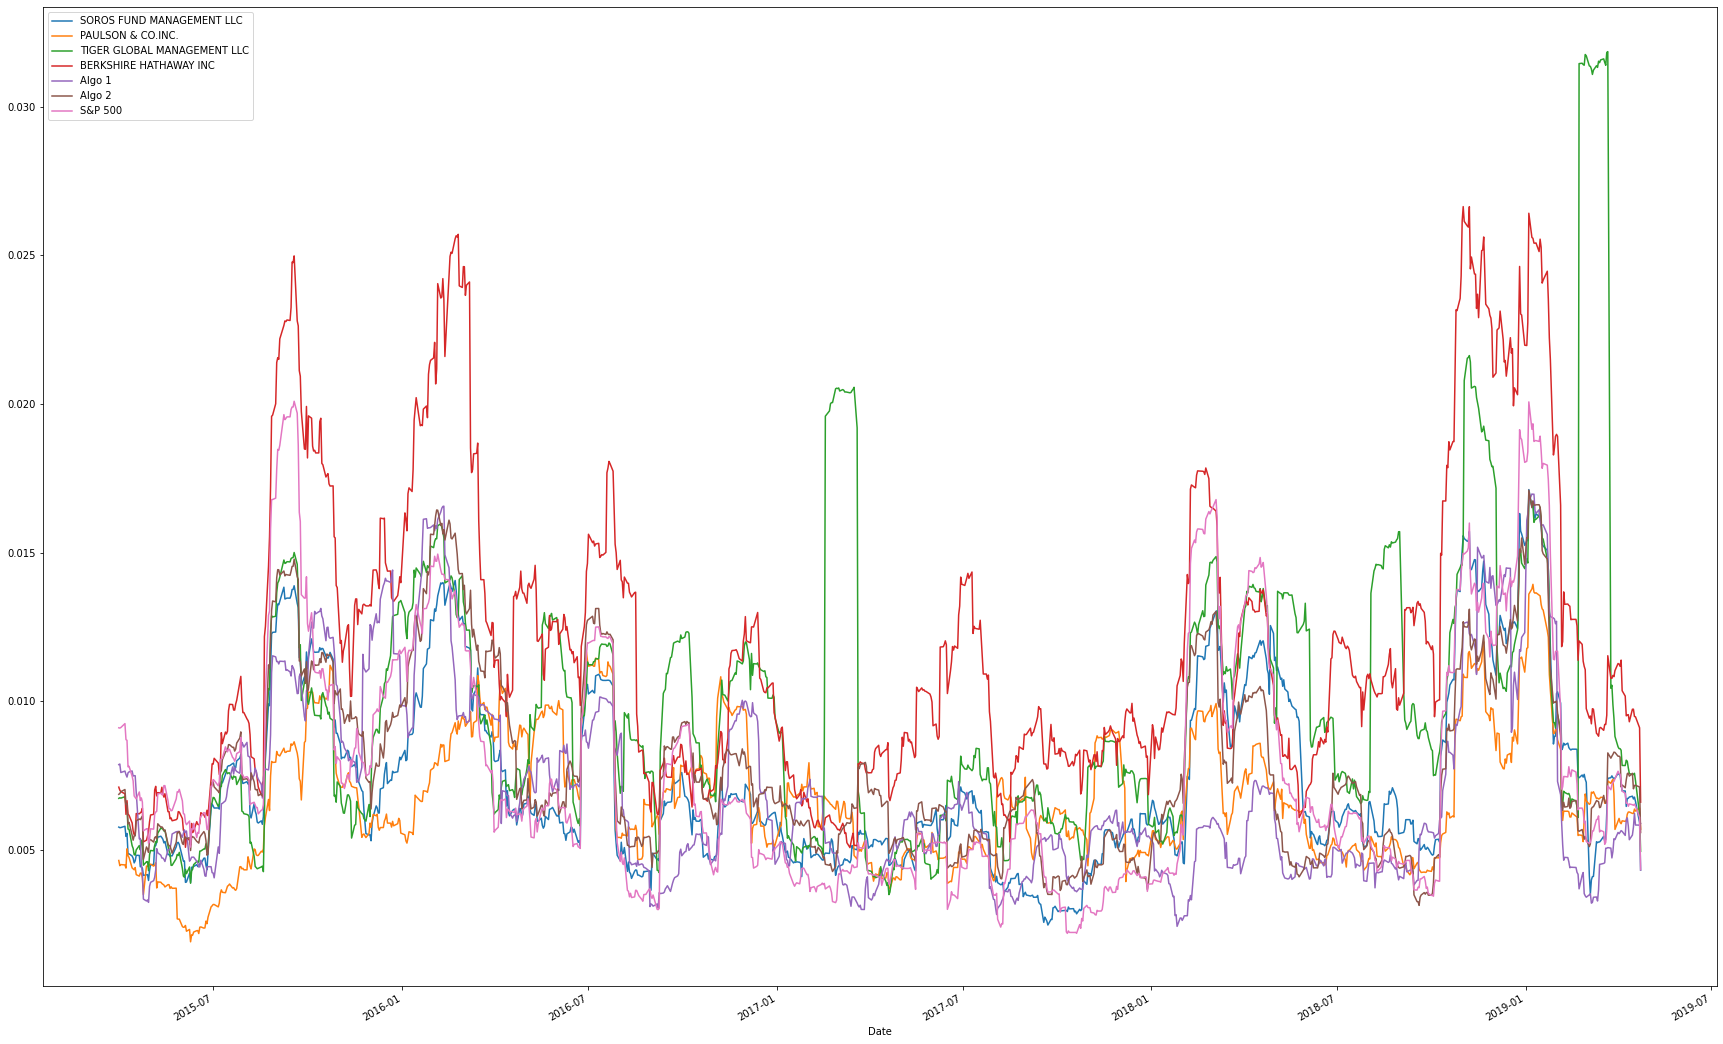

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_DailyRet_std21 = combined_Daily_Returns.rolling(window=21).std()
# Plot the rolling standard deviation
combined_DailyRet_std21.plot(figsize=(30, 20))

<AxesSubplot:>

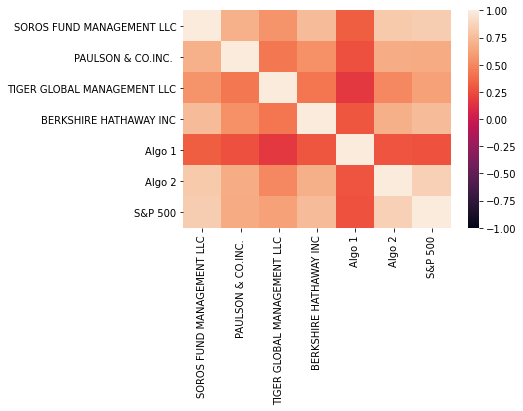

In [23]:
# Calculate the correlation
correlation = combined_Daily_Returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

1.8217749991632822e-05 7.316632424648712e-05 0.24899091459425746


<AxesSubplot:title={'center':'Rolling 60-Day Beta Trend Algo1'}, xlabel='Date'>

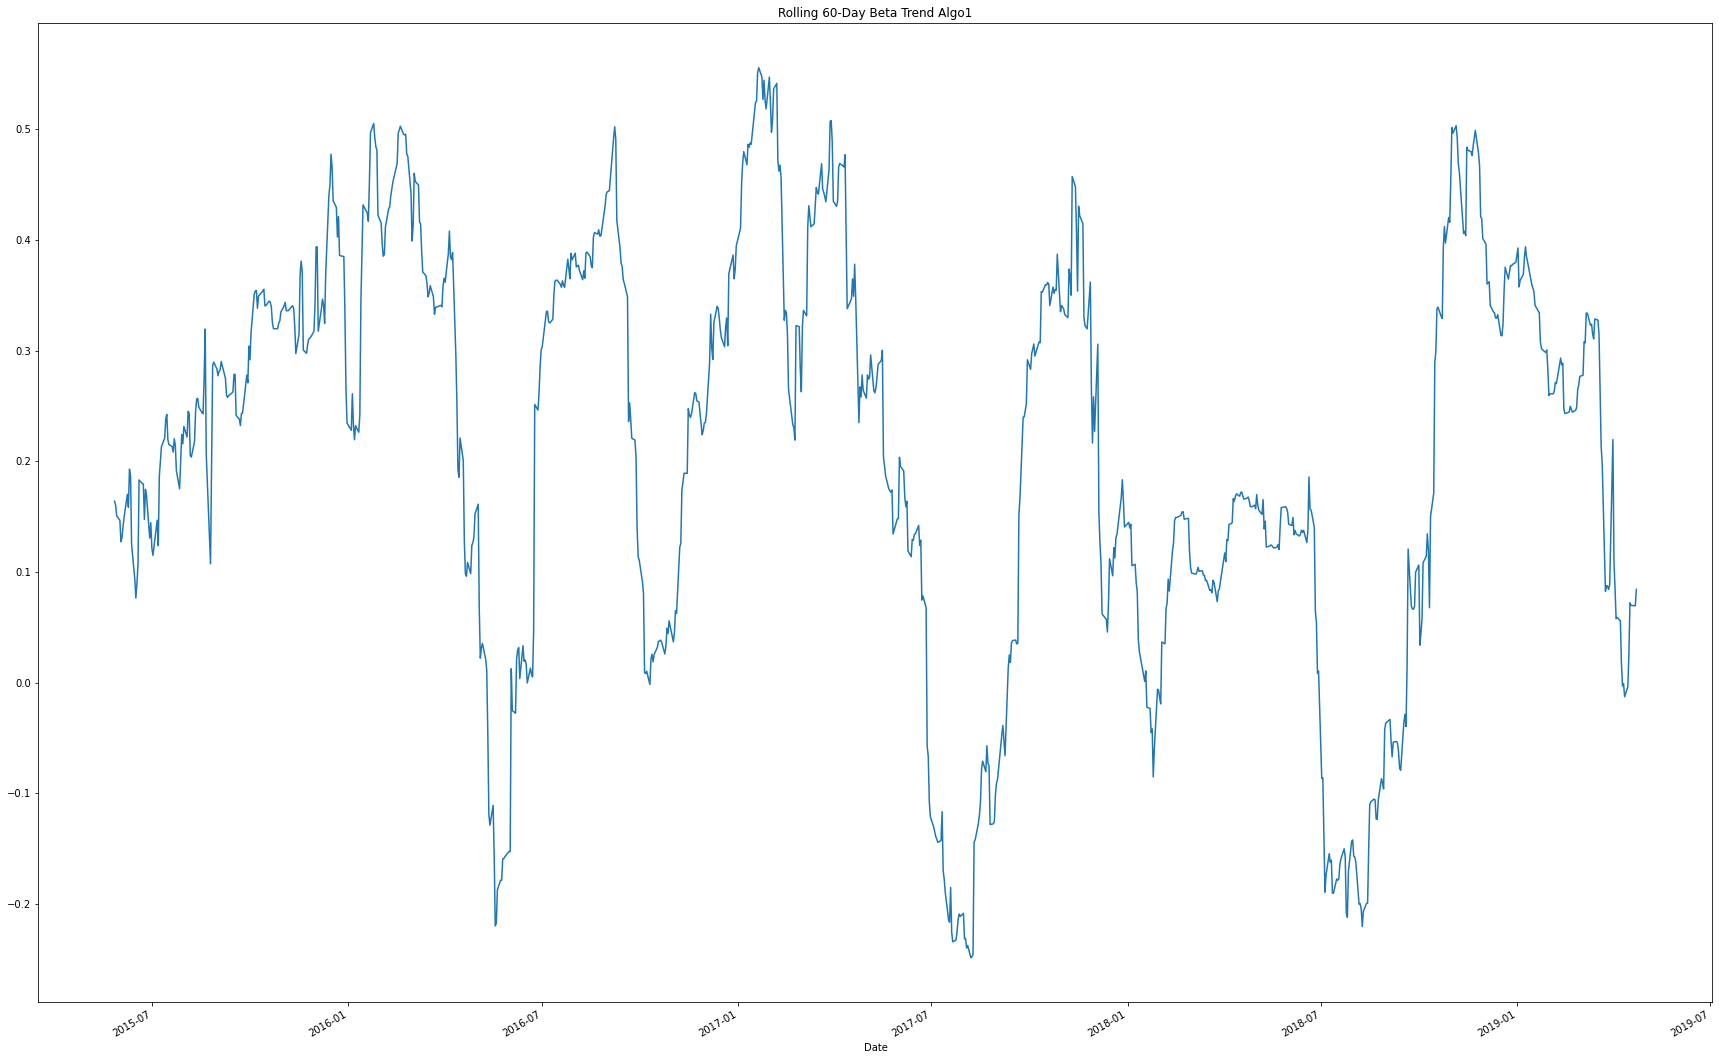

In [87]:
# Calculate covariance of a single portfolio
covarAlgo1 = combined_Daily_Returns['Algo 1'].cov(combined_Daily_Returns['S&P 500'])
# Calculate variance of S&P 500
varSP500 = combined_Daily_Returns['S&P 500'].var()

# Computing beta for Algo1
beta = covarAlgo1 / varSP500
print(covarAlgo1,varSP500,beta)
# Plot beta trend
rolling_covar_Algo1 = combined_Daily_Returns['Algo 1'].rolling(window=60).cov(combined_Daily_Returns['S&P 500'])
rolling_var_Algo1 = combined_Daily_Returns['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covar_Algo1 / rolling_var_Algo1

rolling_beta.plot(figsize=(30, 20), title='Rolling 60-Day Beta Trend Algo1')

In [66]:
ema = combined_Daily_Returns.ewm(halflife=21).mean()
ema

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.004462
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.002514
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005575
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.003543
...,...,...,...,...,...,...,...
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,0.001352
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,0.001234
2019-04-18,0.001341,0.000256,-0.000881,0.001907,0.000511,0.001073,0.001246


SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64


<AxesSubplot:title={'center':'Annual Sharpe Ratios'}>

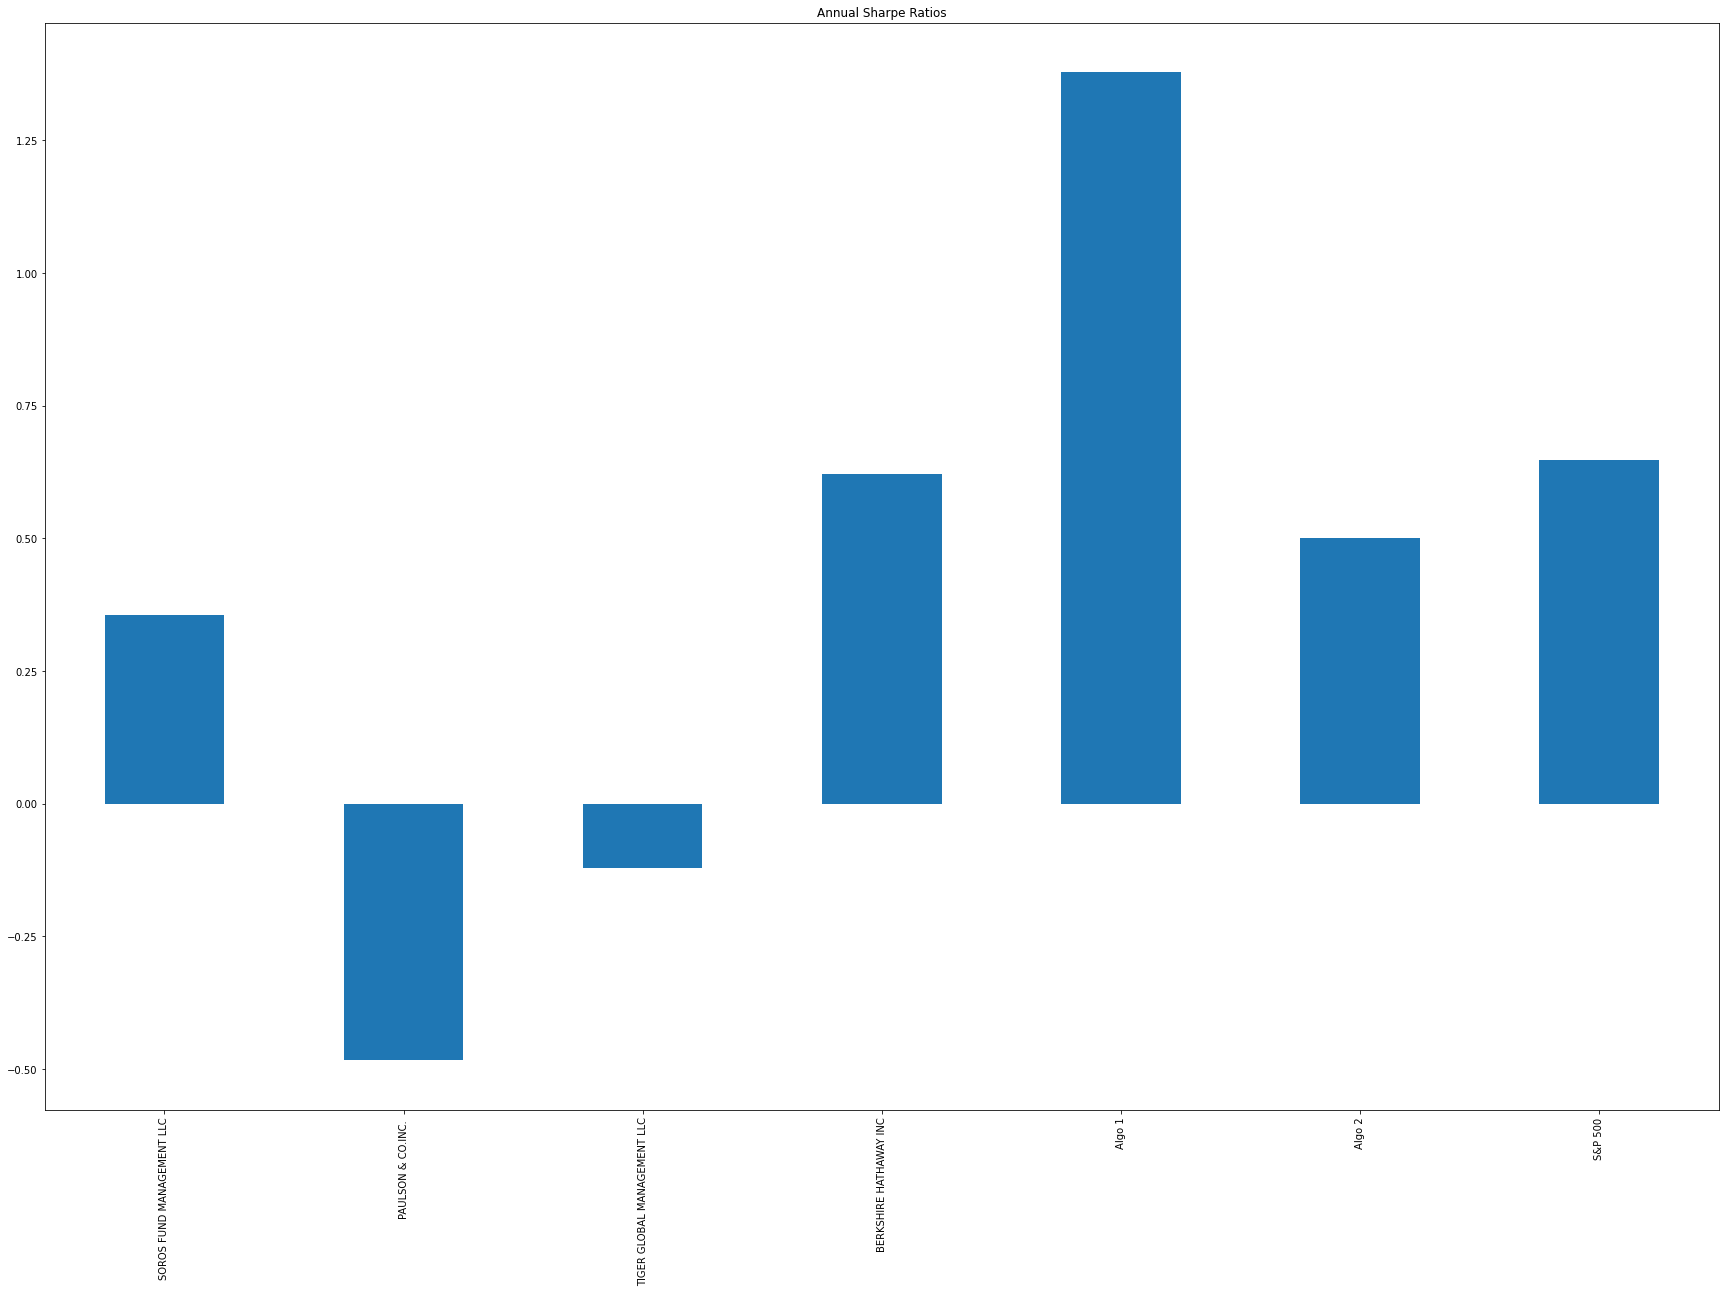

In [88]:
# Annualized Sharpe Ratios
risk_free_rate = 0.1
volatility = combined_Daily_Returns_std * np.sqrt(252)
sharpe_ratio = (combined_Daily_Returns.mean() * 252)/ volatility
ann_sharpe_ratio = sharpe_ratio * (252**0.5)
print(sharpe_ratio)
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar',figsize=(30, 20), title='Annual Sharpe Ratios')

In [89]:
#Getting Custom Ticker Dataframes with functions
input_path_aal = getInputFilePath()
aal_df = getDataTable(input_path_aal,'Date')
aal_df.drop(columns=['Volume', 'Open', 'High', 'Low'], inplace=True)
aal_df.columns = ['AAL']
aal_df.index = aal_df.index.astype('datetime64[ns]')
aal_df.rename(index={'':'Date'},inplace=True)
aal_df.index = aal_df.index.date
#aal_df.head()

input_path_intc = getInputFilePath()
intc_df = getDataTable(input_path_intc,'Date')
intc_df.drop(columns=['Volume', 'Open', 'High', 'Low'], inplace=True)
intc_df.columns = ['INTC']
intc_df.index = intc_df.index.astype('datetime64[ns]')
intc_df.rename(index={'':'Date'},inplace=True)
intc_df.index = intc_df.index.date
#intc_df.head()

input_path_duk = getInputFilePath()
duk_df = getDataTable(input_path_duk,'Date')
duk_df.drop(columns=['Volume', 'Open', 'High', 'Low'], inplace=True)
duk_df.columns = ['DUK']
duk_df.index = duk_df.index.astype('datetime64[ns]')
duk_df.rename(index={'':'Date'},inplace=True)
duk_df.index = duk_df.index.date



Enter the path & file name that you wish to read from: Resources/aal_data.csv
Enter the path & file name that you wish to read from: Resources/intc_data.csv
Enter the path & file name that you wish to read from: Resources/duk_data.csv


In [90]:
# Combine all stocks in a single DataFrame
my_tickers_df = combine_DataTables([aal_df,intc_df,duk_df],axis='columns',join='inner',sortData=True)
# Reset Date index
my_tickers_df.reset_index(inplace=True)
my_tickers_df.rename(columns={'index':'Date'},inplace=True)
my_tickers_df.set_index('Date',drop=True,inplace=True)
my_tickers_df.tail()
# Reorganize portfolio data by having a column per symbol
my_tickers_df.sort_index(inplace=True)
#all_df.index.astype('datetime64[ns]')
my_tickers_df.head()

# Calculate daily returns
dailyRet_myTickers = my_tickers_df.pct_change()

# Drop NAs
dailyRet_myTickers.dropna(inplace=True)

# Display sample data
dailyRet_myTickers.index = dailyRet_myTickers.index.astype('datetime64[ns]')
print(dailyRet_myTickers.index)
dailyRet_myTickers.tail()

DatetimeIndex(['2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
               '2015-01-15', '2015-01-16',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=1510, freq=None)


,AAL,INTC,DUK
Date,,,
2020-12-24,-0.014475,0.010737,0.007075
2020-12-28,0.025543,0.000000,0.006468
2020-12-29,-0.012453,0.049288,-0.004321
2020-12-30,0.018285,-0.012958,0.007790
2020-12-31,-0.023529,0.021949,0.011042


In [91]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_ret_myTickers = dailyRet_myTickers.dot(weights)

# Display sample data
portfolio_ret_myTickers.tail()

Date
2020-12-24    0.001112
2020-12-28    0.010670
2020-12-29    0.010838
2020-12-30    0.004372
2020-12-31    0.003154
dtype: float64

In [92]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = combine_DataTables([dailyRet_myTickers,combined_Daily_Returns],axis='columns',join='inner')
all_returns.index.astype('datetime64[ns]')
all_returns.dropna(inplace=True)

all_returns.head()

,AAL,INTC,DUK,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,,,
2015-03-03,0.009522,0.001174,0.005840,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.003691,0.000587,-0.005548,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,-0.011236,-0.011430,0.006487,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.008264,-0.016009,-0.033772,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,-0.001667,-0.014161,-0.002668,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

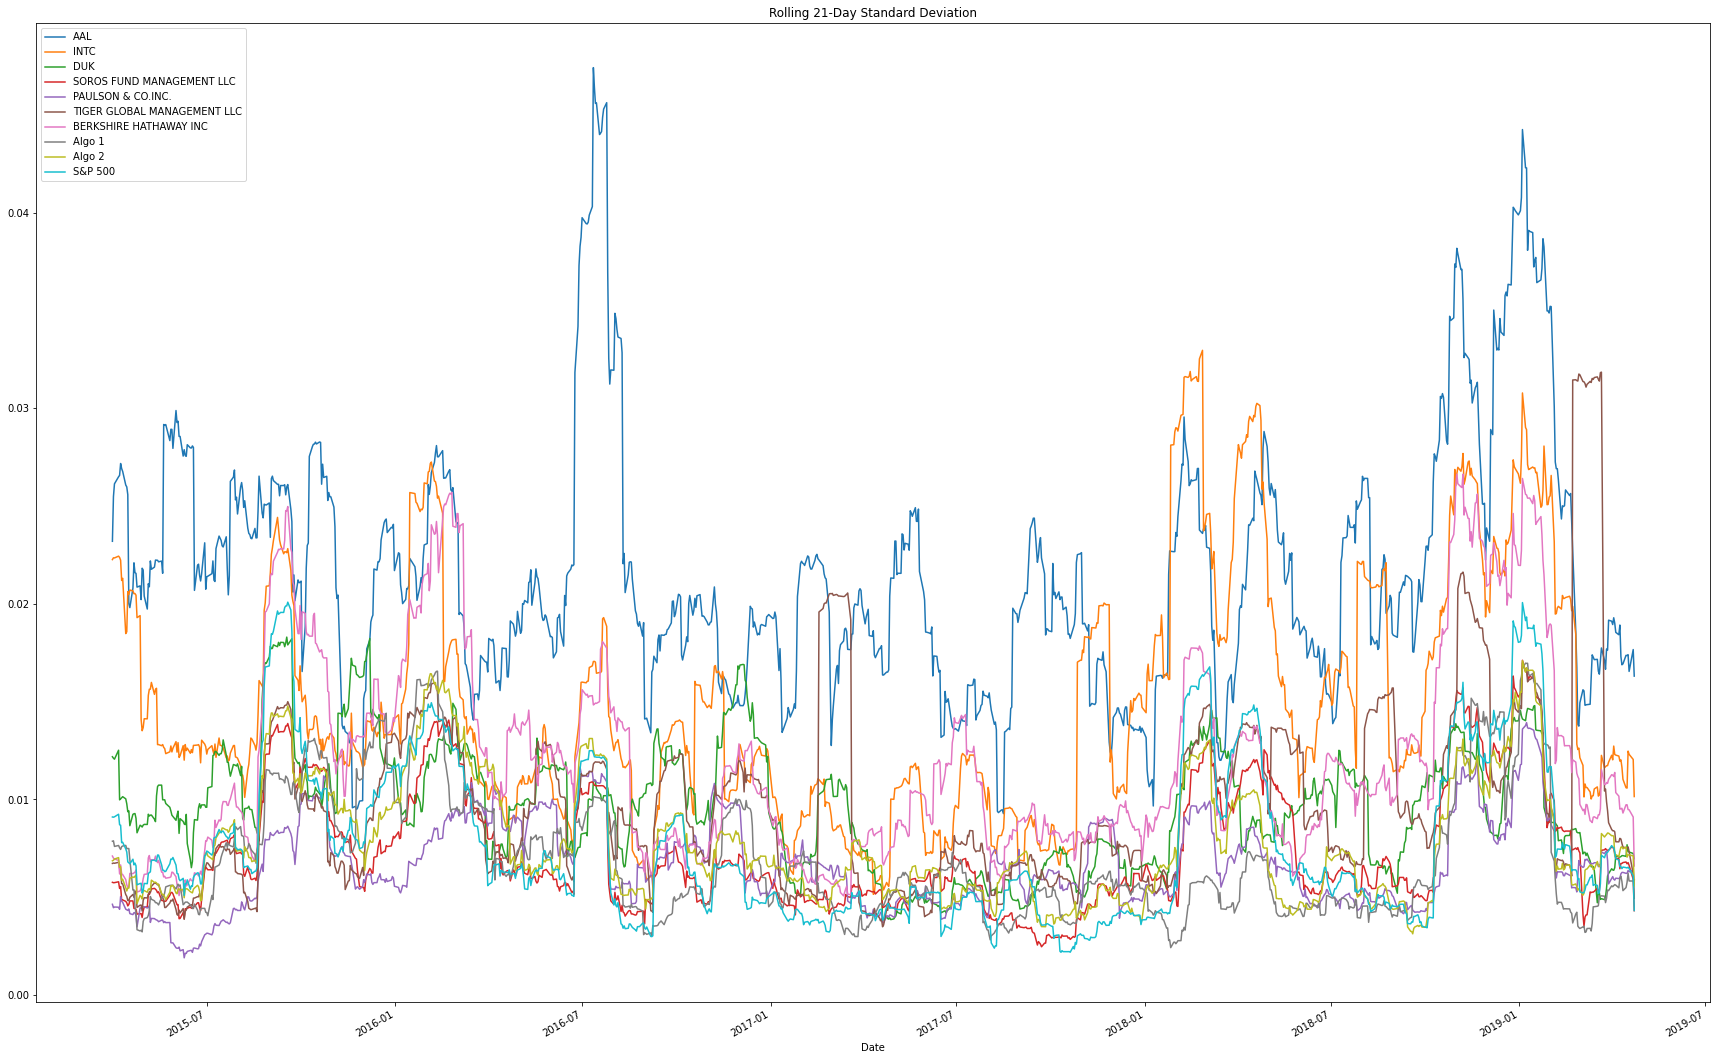

In [93]:
# Calculate the annualized `std`
all_returns_std = all_returns.std()
allRet_annual_std = all_returns_std * math.sqrt(252)
# Calculate rolling standard deviation
allRet_std21 = all_returns.rolling(window=21).std()
# Plot rolling standard deviation
allRet_std21.plot(figsize=(30, 20), title='Rolling 21-Day Standard Deviation')

<AxesSubplot:>

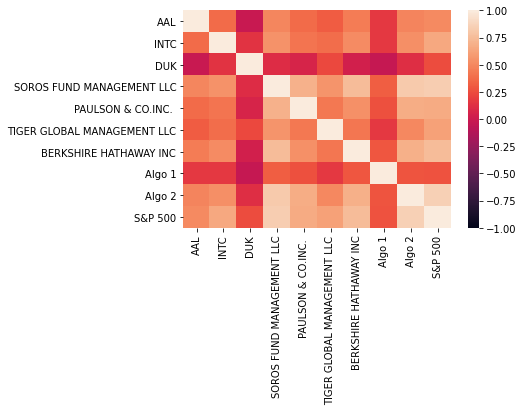

In [49]:
# Calculate and plot the correlation
correlation = all_returns.corr()
correlation
sns.heatmap(correlation,vmin=-1,vmax=1)

<AxesSubplot:title={'center':'Rolling 60-Day Beta of AAL'}, xlabel='Date'>

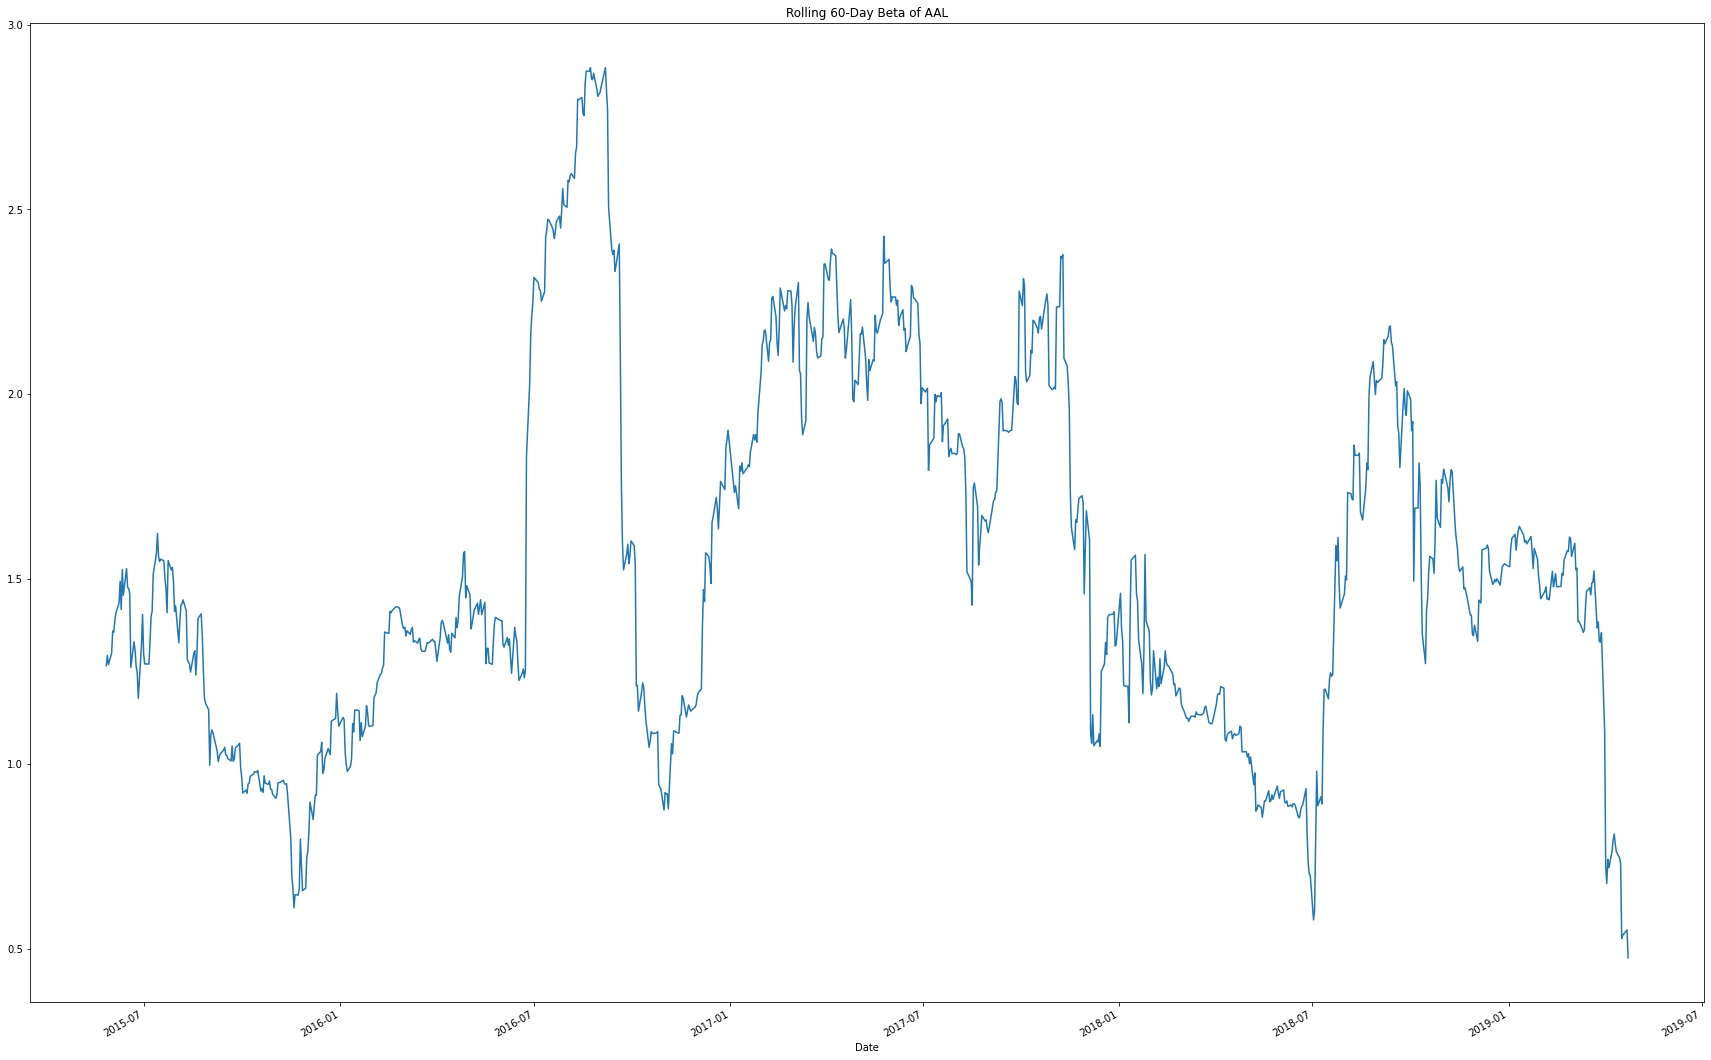

In [53]:
#Calculate & plot the rolling 60-Day Beta compared to the S&P
rolling_covariance = all_returns['AAL'].rolling(window=60).cov(all_returns['S&P 500'])
rolling_variance = all_returns['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(30, 20), title='Rolling 60-Day Beta of AAL')

<AxesSubplot:title={'center':'Rolling 60-Day Beta of INTC'}, xlabel='Date'>

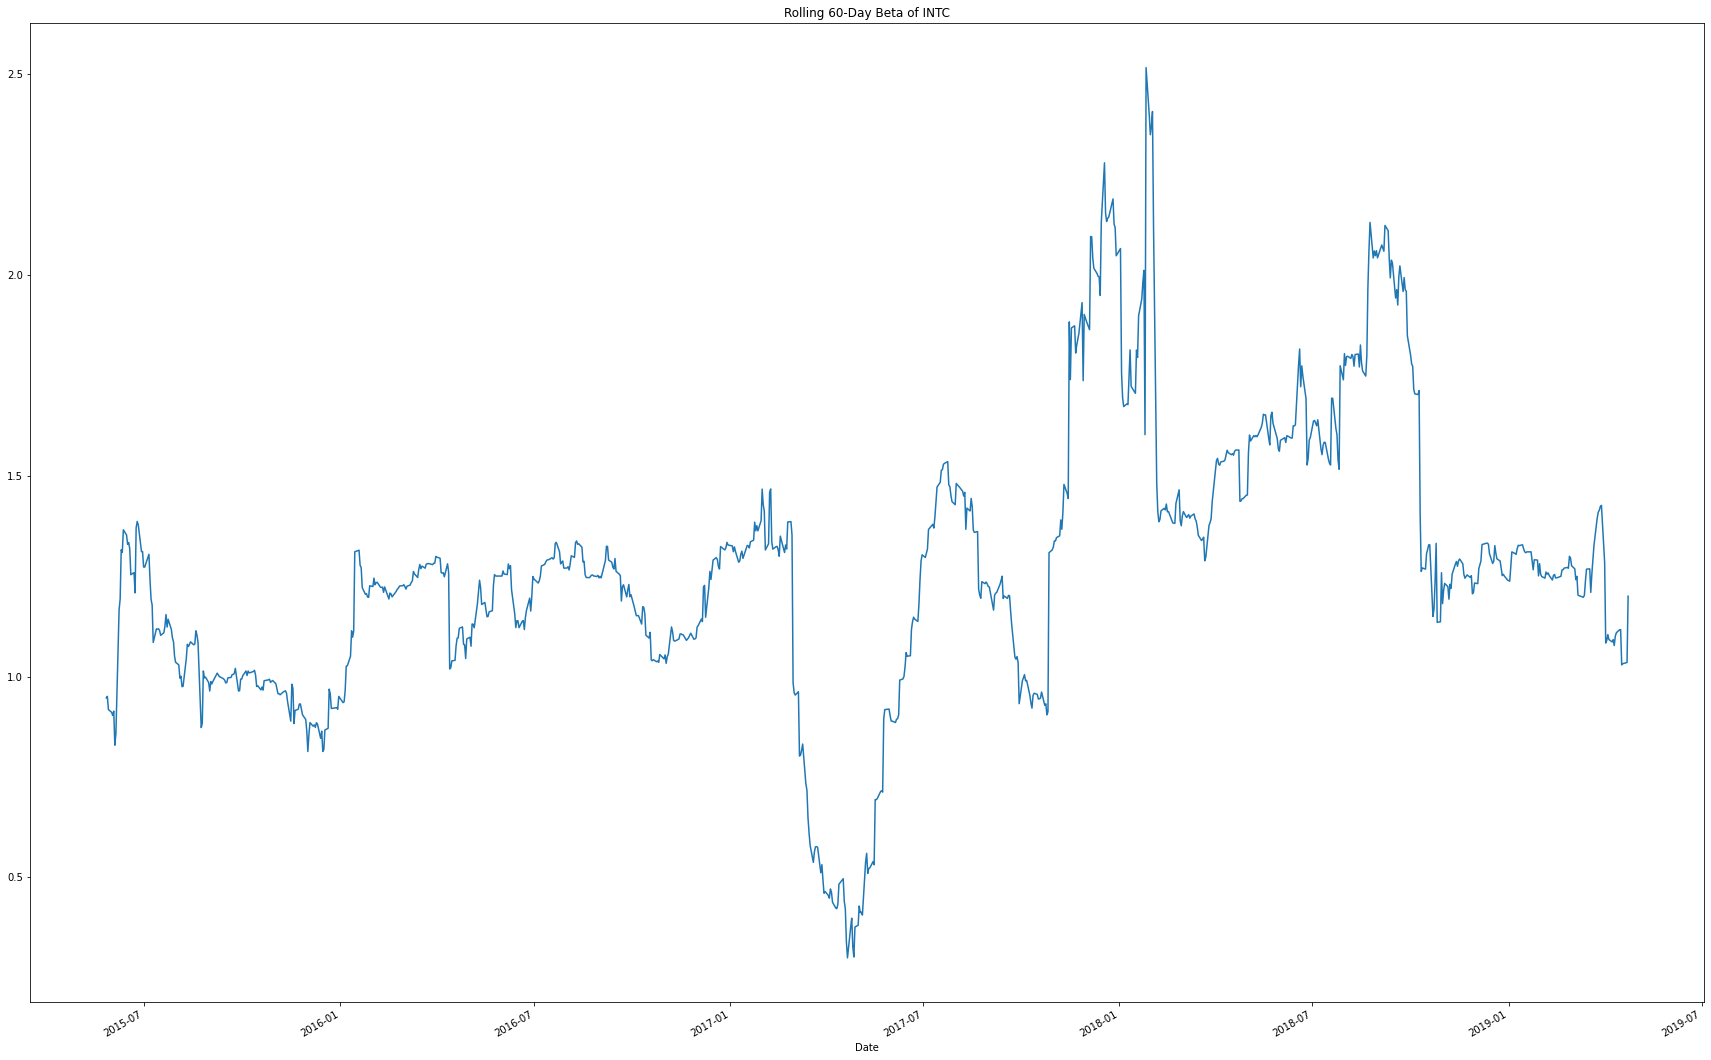

In [94]:
# Calculate and plot Beta
rolling_covariance = all_returns['INTC'].rolling(window=60).cov(all_returns['S&P 500'])
rolling_variance = all_returns['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(30, 20), title='Rolling 60-Day Beta of INTC')

<AxesSubplot:title={'center':'Rolling 60-Day Beta of DUK'}, xlabel='Date'>

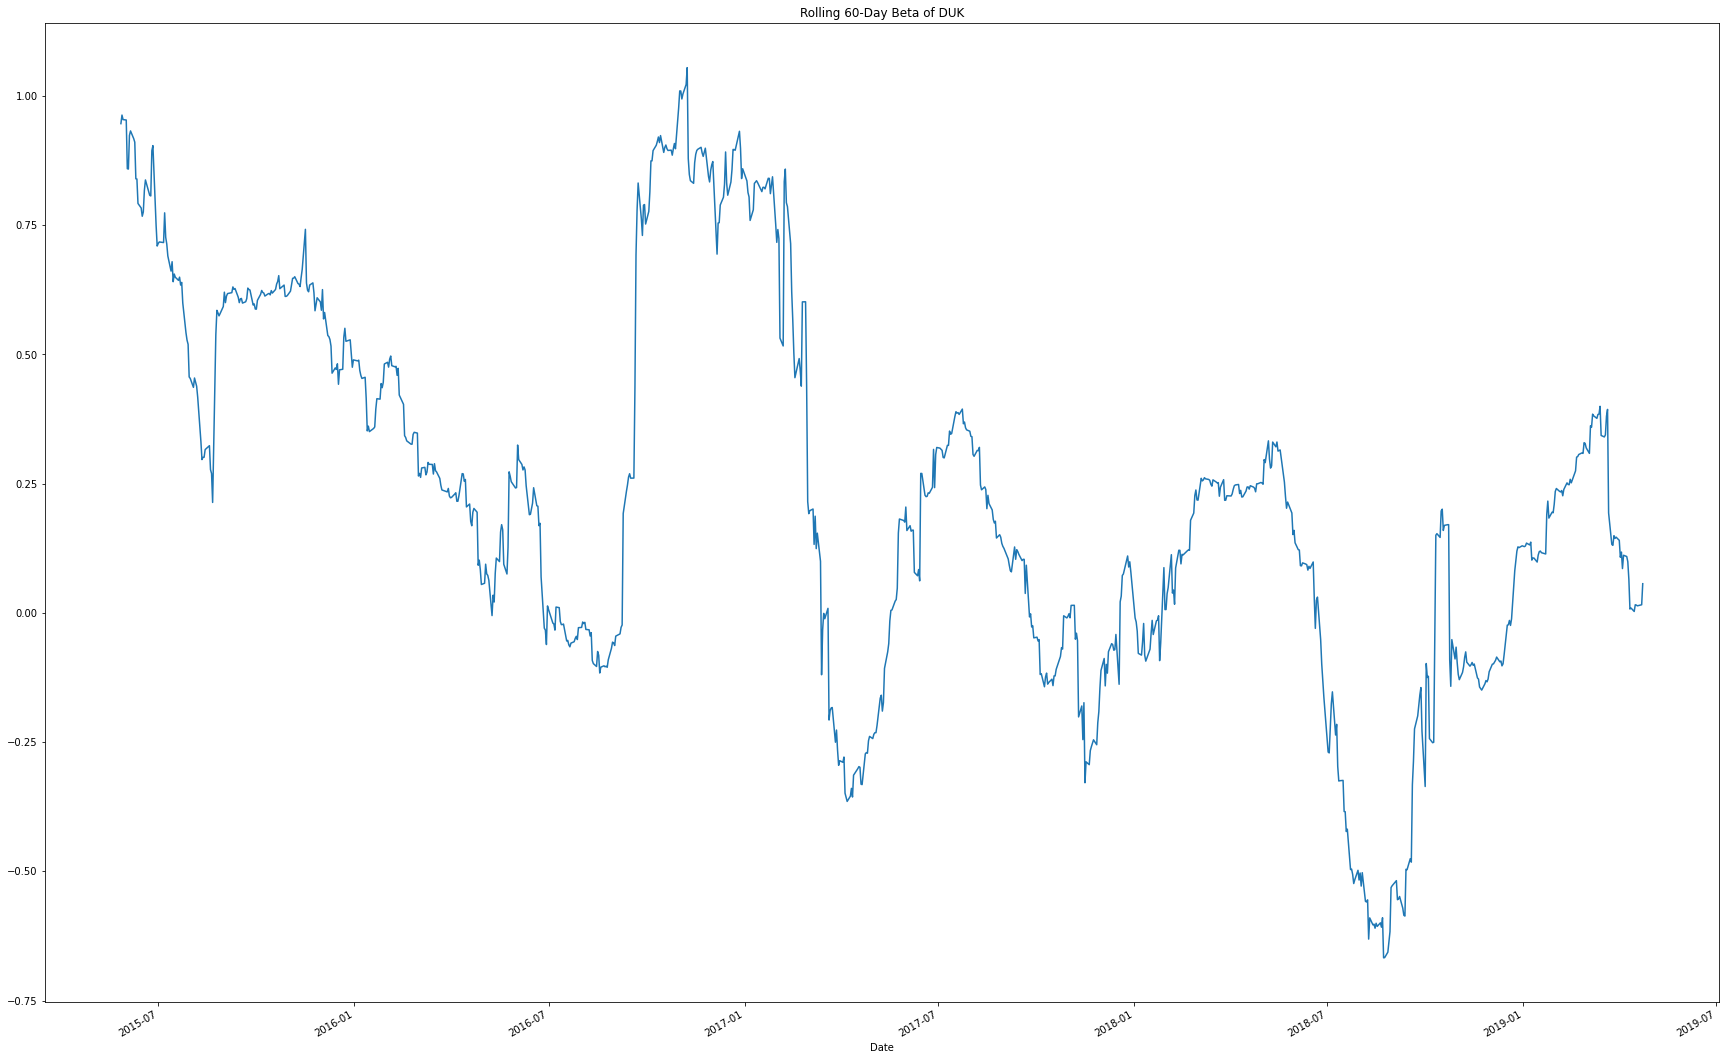

In [55]:
rolling_covariance = all_returns['DUK'].rolling(window=60).cov(all_returns['S&P 500'])
rolling_variance = all_returns['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(30, 20), title='Rolling 60-Day Beta of DUK')

AAL                           -0.058582
INTC                           0.647216
DUK                            0.298377
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64


<AxesSubplot:title={'center':'Combined Annual Sharpe Ratios'}>

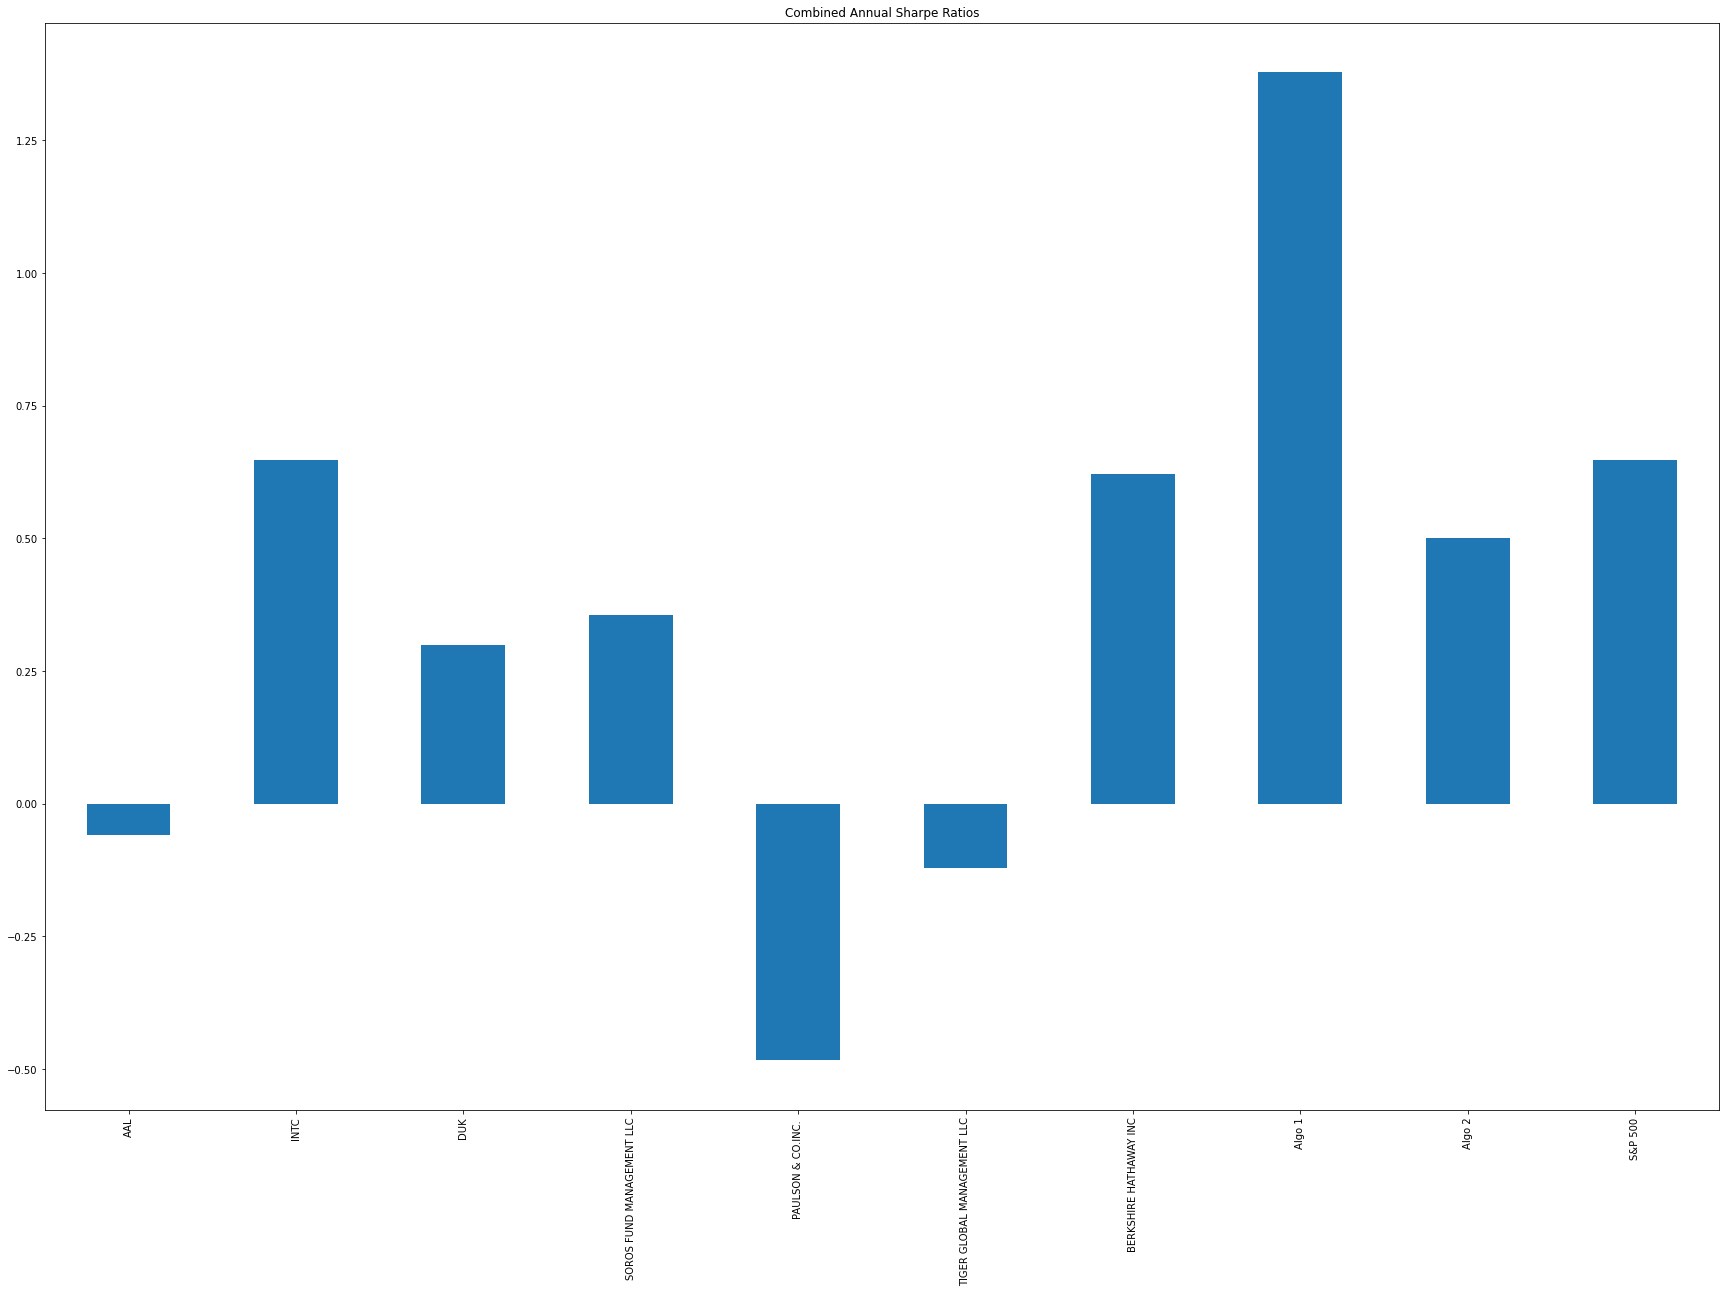

In [95]:
# Calculate Annualzied Sharpe Ratios
volatility = all_returns_std * np.sqrt(252)
sharpe_ratio = (all_returns.mean() * 252)/ volatility
annual_sharpe_ratio = sharpe_ratio * (252**0.5)
print(sharpe_ratio)
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar',figsize=(30, 20), title='Combined Annual Sharpe Ratios')

# My Thoughts
* As far as the given (default) portfolio, Algo1 seems to be performing the best. Paulson is performing the worst.
* For my portfolio, Intel Corporation (INTC) is performing the best and American Airlines (AAL) performs the worst.
* The Whale & Algo traders are outperforming my portfolio in general.